In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
from scipy import signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\yulas\.conda\envs\fedot_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Подготовка датасетов (отсеивание остатков)

In [4]:
df_nemo=pd.read_csv('./timelines_data/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            
#df_nemo=df_nemo[:-1]
df_nemo

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.043496,0.041205,0.043296,0.049496,0.018957,0.020623,0.043043,0.037323,0.030662,0.021557,...,-0.006893,-0.016234,-0.021648,-0.021540,0.006230,0.002845,-0.005700,-0.013671,0.009085,2002-01-01
1,0.047268,0.046536,0.044069,0.050039,0.019246,0.021221,0.045237,0.040602,0.034548,0.025336,...,0.000493,-0.009252,-0.014643,-0.014258,0.013718,0.008249,0.000039,-0.006766,0.014637,2002-01-02
2,0.044126,0.044443,0.036774,0.041407,0.010971,0.014720,0.043880,0.036382,0.029206,0.017985,...,-0.004167,-0.012748,-0.017804,-0.017722,0.007621,-0.002128,-0.008281,-0.012912,0.003973,2002-01-03
3,0.062028,0.062371,0.050494,0.054275,0.025246,0.029794,0.058684,0.048697,0.041713,0.030885,...,-0.010836,-0.015992,-0.018431,-0.017348,-0.000368,-0.010376,-0.011623,-0.014038,0.001755,2002-01-04
4,0.071914,0.072430,0.058286,0.061006,0.027560,0.035322,0.063933,0.056161,0.049207,0.039845,...,-0.000004,-0.003843,-0.003772,-0.002390,0.010757,0.006049,0.003313,-0.000569,0.019566,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.045611,0.054914,0.059584,0.077185,0.028578,0.029135,0.054378,0.072661,0.074267,0.059977,...,0.111664,0.117896,0.114245,0.115759,0.105825,0.109763,0.112713,0.115663,0.101524,2002-12-27
361,0.040227,0.046561,0.047235,0.068944,0.020274,0.021585,0.049065,0.066814,0.069268,0.056660,...,0.103190,0.108623,0.107286,0.109981,0.097514,0.100478,0.104291,0.107933,0.094374,2002-12-28
362,0.036336,0.040292,0.039558,0.064122,0.014276,0.015902,0.045349,0.060325,0.064344,0.053484,...,0.099011,0.102547,0.102639,0.105849,0.095617,0.095864,0.098940,0.101429,0.090882,2002-12-29
363,0.032965,0.035805,0.034460,0.062205,0.009790,0.011852,0.042518,0.053357,0.060313,0.050977,...,0.098158,0.100042,0.100620,0.103715,0.097523,0.095937,0.098053,0.098531,0.092439,2002-12-30


In [5]:
df_rean=pd.read_csv('./timelines_data/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
df_rean

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.034992,0.034718,0.032032,0.027844,0.026310,0.028339,0.027947,0.027634,0.026690,0.016180,...,-0.020535,-0.027864,-0.034043,-0.034043,0.008050,0.000913,-0.021561,-0.030222,0.001356,2002-01-01
1,0.058270,0.058306,0.055602,0.050686,0.049921,0.051845,0.052467,0.052148,0.051075,0.040347,...,0.022316,0.014934,0.009822,0.009822,0.050113,0.046925,0.027756,0.020172,0.049706,2002-01-02
2,0.062436,0.062537,0.059925,0.055279,0.054040,0.055957,0.057700,0.057536,0.056527,0.046154,...,0.012881,0.001712,-0.008514,-0.008514,0.039593,0.032066,0.008459,-0.002192,0.025435,2002-01-03
3,0.063424,0.063512,0.061063,0.056140,0.054533,0.056757,0.059166,0.058829,0.057676,0.046912,...,-0.017130,-0.022521,-0.022301,-0.022301,0.002329,-0.001674,-0.016318,-0.021154,0.004181,2002-01-04
4,0.056305,0.056191,0.053409,0.047372,0.047233,0.049387,0.050545,0.049952,0.048565,0.036534,...,0.012275,0.009005,0.006407,0.006407,0.034164,0.037784,0.022573,0.016598,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.047681,0.039707,0.041549,0.063631,0.066376,0.062971,0.055390,0.049154,0.048711,...,0.080870,0.076975,0.081327,0.081327,0.091999,0.084992,0.073588,0.072650,0.071904,2002-12-27
361,0.056429,0.049822,0.040671,0.040778,0.063836,0.067421,0.064336,0.056341,0.049220,0.048054,...,0.059155,0.056916,0.064658,0.064658,0.071171,0.066003,0.055439,0.054380,0.060337,2002-12-28
362,0.059627,0.053090,0.045162,0.045927,0.066616,0.070397,0.067439,0.059568,0.052695,0.052243,...,0.059734,0.057916,0.064062,0.064062,0.076493,0.074301,0.060417,0.056684,0.070495,2002-12-29
363,0.066121,0.059172,0.051419,0.052143,0.075578,0.078953,0.074769,0.066495,0.059423,0.059202,...,0.067323,0.065050,0.070196,0.070196,0.084828,0.082266,0.066639,0.062536,0.074877,2002-12-30


## Функция для получения коэффициентов для взвешенного ансамбля

In [6]:
# a*nemo+b*arima=real - multiple linear regression (https://datatofish.com/multiple-linear-regression-python/)

def get_hybrid_coeffs(nemo_tr, arima_tr, real_tr):
    df=pd.DataFrame()
    df['x1']=nemo_tr
    df['x2']=arima_tr
    df['y']=real_tr
    X = df[['x1', 'x2']]
    Y = df['y']
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    return (regr.intercept_, regr.coef_)

## Взвешенная гибридная модель (NEMO+ARIMA)

In [7]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [8]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts+const
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        '''
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        '''
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)
        

In [9]:
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000246,0.012189,27.461,0.073323
1,75.84_8.72,0.000614,0.020515,45.322,-1.572977,0.000149,0.009442,31.287,0.377780
2,75.64_8.72,0.000359,0.015332,37.656,-0.641434,0.000140,0.009052,28.004,0.359996
3,75.44_8.72,0.000222,0.012016,32.666,0.067874,0.000186,0.010628,37.349,0.216616
4,76.44_9.72,0.001116,0.029940,44.233,-2.291690,0.000503,0.019219,30.778,-0.483364
...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.002006,0.037171,83.244,0.056572,0.000764,0.021175,48.662,0.640902
273,76.84_31.72,0.001887,0.036070,89.839,0.153044,0.000816,0.022222,55.840,0.633834
274,76.64_31.72,0.001399,0.030386,51.047,0.408133,0.000817,0.021562,65.690,0.654613
275,76.44_31.72,0.001411,0.030298,48.518,0.445341,0.000847,0.022008,34.375,0.666886


In [16]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000246,0.012189,27.461,0.073323,-0.000652,-0.013891,-23.671,-2.304545
1,75.84_8.72,0.000614,0.020515,45.322,-1.572977,0.000149,0.009442,31.287,0.377780,-0.000466,-0.011072,-14.035,-1.195197
2,75.64_8.72,0.000359,0.015332,37.656,-0.641434,0.000140,0.009052,28.004,0.359996,-0.000219,-0.006281,-9.652,-0.281437
3,75.44_8.72,0.000222,0.012016,32.666,0.067874,0.000186,0.010628,37.349,0.216616,-0.000035,-0.001388,4.683,0.148742
4,76.44_9.72,0.001116,0.029940,44.233,-2.291690,0.000503,0.019219,30.778,-0.483364,-0.000613,-0.010721,-13.455,-1.808327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.002006,0.037171,83.244,0.056572,0.000764,0.021175,48.662,0.640902,-0.001243,-0.015996,-34.582,0.584329
273,76.84_31.72,0.001887,0.036070,89.839,0.153044,0.000816,0.022222,55.840,0.633834,-0.001071,-0.013848,-33.999,0.480790
274,76.64_31.72,0.001399,0.030386,51.047,0.408133,0.000817,0.021562,65.690,0.654613,-0.000583,-0.008824,14.643,0.246480
275,76.44_31.72,0.001411,0.030298,48.518,0.445341,0.000847,0.022008,34.375,0.666886,-0.000564,-0.008290,-14.143,0.221544


In [19]:
new = errors_df['POINT'].str.split("_", n = 1, expand = True)

errors_df['x']=new[0]
errors_df['y']=new[1]
errors_df.to_csv('./spatial_arima_weigh_hyb_105.csv', sep=';', index=False)

In [18]:
sns.distplot(errors_df, x="MSE_DIF")

TypeError: distplot() got an unexpected keyword argument 'x'

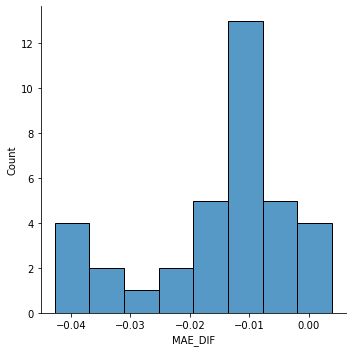

In [72]:
sns.displot(errors_df, x="MAE_DIF")

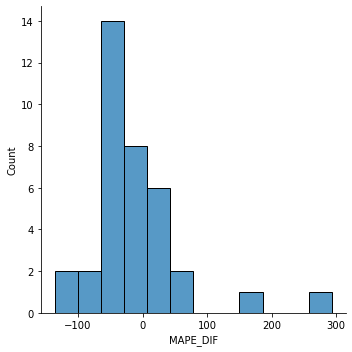

In [73]:
sns.displot(errors_df, x="MAPE_DIF")

## Пробуем без константы

In [77]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        '''
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        '''
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)
        

In [78]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000788,0.024322,46.502,-1.961911,-0.000111,-0.001758,-4.630,-0.415957
1,76.84_10.72,0.000408,0.017232,33.206,-0.780398,0.000971,0.028322,53.979,-3.241047,0.000564,0.011091,20.773,2.460649
2,76.04_10.72,0.001129,0.031035,46.234,-2.748760,0.001790,0.040104,60.970,-4.943394,0.000661,0.009069,14.736,2.194633
3,75.24_10.72,0.000140,0.009324,22.691,0.342996,0.000361,0.016485,31.919,-0.696076,0.000221,0.007162,9.228,0.353081
4,76.84_12.72,0.000389,0.016450,43.900,-0.108093,0.001131,0.030180,65.847,-2.224106,0.000742,0.013731,21.947,2.116013
5,76.04_12.72,0.000531,0.020157,39.932,-1.099442,0.000961,0.028256,56.358,-2.798944,0.000430,0.008098,16.426,1.699502
6,75.24_12.72,0.000169,0.010375,29.298,0.169875,0.000402,0.016926,40.795,-0.979850,0.000234,0.006551,11.497,0.809974
7,76.04_14.72,0.000523,0.018871,47.211,0.022249,0.001365,0.032453,62.199,-1.553176,0.000842,0.013582,14.988,1.530927
8,75.24_14.72,0.000250,0.013605,5.853,0.112713,0.000761,0.024444,44.849,-1.705510,0.000511,0.010839,38.996,1.592797
9,76.04_16.72,0.000724,0.021343,31.235,-0.187508,0.000659,0.022455,22.274,-0.080107,-0.000065,0.001111,-8.961,-0.107402


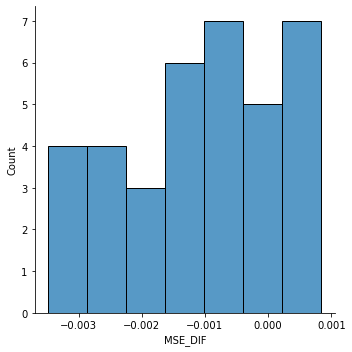

In [79]:
sns.displot(errors_df, x="MSE_DIF")

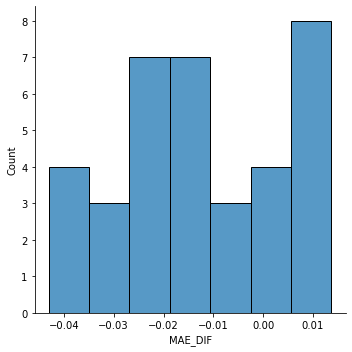

In [80]:
sns.displot(errors_df, x="MAE_DIF")

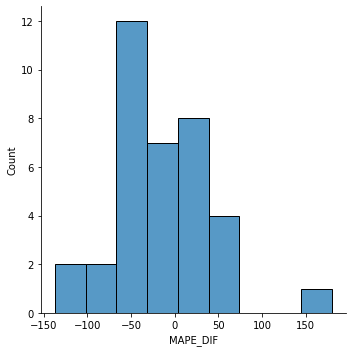

In [81]:
sns.displot(errors_df, x="MAPE_DIF")

***без константы вроде немножко хуже***

## Теперь увеличим выборку

In [88]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_NEMO_SPITZ_GRID.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%d.%m.%Y')

for column in list(df_nemo.columns.values):
    if column!='dates':
        df_nemo[column]=df_nemo[column]-np.mean(df_nemo[column])
        stl = STL(df_nemo[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            #print(ks)
            df_nemo[column]=df_nemo[column]-res.resid
        else:
            print(column)
            

df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_ARCTIC_reanalysis_GRID.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')

for column in list(df_rean.columns.values):
    if column!='dates':
        df_rean[column]=df_rean[column]-np.mean(df_rean[column])
        stl = STL(df_rean[column], period=80)
        res = stl.fit()
        params = norm.fit(res.resid)
        ks = kstest(res.resid, 'norm', params, N=1000)        
        if ks[1]>=0.05:
            #sns.distplot(res.resid, fit=norm, hist=False)
            #plt.show()
            df_rean[column]=df_rean[column]-res.resid
        else:
            print(column)
            
df_rean

,76.04_8.72,75.84_8.72,75.64_8.72,75.44_8.72,76.44_9.72,76.24_9.72,76.04_9.72,75.84_9.72,75.64_9.72,75.44_9.72,...,76.84_30.72,76.64_30.72,76.44_30.72,76.24_30.72,77.04_31.72,76.84_31.72,76.64_31.72,76.44_31.72,76.84_32.72,dates
0,0.034992,0.034718,0.032032,0.027844,0.026310,0.028339,0.027947,0.027634,0.026690,0.016180,...,-0.020535,-0.027864,-0.034043,-0.034043,0.008050,0.000913,-0.021561,-0.030222,0.001356,2002-01-01
1,0.058270,0.058306,0.055602,0.050686,0.049921,0.051845,0.052467,0.052148,0.051075,0.040347,...,0.022316,0.014934,0.009822,0.009822,0.050113,0.046925,0.027756,0.020172,0.049706,2002-01-02
2,0.062436,0.062537,0.059925,0.055279,0.054040,0.055957,0.057700,0.057536,0.056527,0.046154,...,0.012881,0.001712,-0.008514,-0.008514,0.039593,0.032066,0.008459,-0.002192,0.025435,2002-01-03
3,0.063424,0.063512,0.061063,0.056140,0.054533,0.056757,0.059166,0.058829,0.057676,0.046912,...,-0.017130,-0.022521,-0.022301,-0.022301,0.002329,-0.001674,-0.016318,-0.021154,0.004181,2002-01-04
4,0.056305,0.056191,0.053409,0.047372,0.047233,0.049387,0.050545,0.049952,0.048565,0.036534,...,0.012275,0.009005,0.006407,0.006407,0.034164,0.037784,0.022573,0.016598,0.045194,2002-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.053847,0.047681,0.039707,0.041549,0.063631,0.066376,0.062971,0.055390,0.049154,0.048711,...,0.080870,0.076975,0.081327,0.081327,0.091999,0.084992,0.073588,0.072650,0.071904,2002-12-27
361,0.056429,0.049822,0.040671,0.040778,0.063836,0.067421,0.064336,0.056341,0.049220,0.048054,...,0.059155,0.056916,0.064658,0.064658,0.071171,0.066003,0.055439,0.054380,0.060337,2002-12-28
362,0.059627,0.053090,0.045162,0.045927,0.066616,0.070397,0.067439,0.059568,0.052695,0.052243,...,0.059734,0.057916,0.064062,0.064062,0.076493,0.074301,0.060417,0.056684,0.070495,2002-12-29
363,0.066121,0.059172,0.051419,0.052143,0.075578,0.078953,0.074769,0.066495,0.059423,0.059202,...,0.067323,0.065050,0.070196,0.070196,0.084828,0.082266,0.066639,0.062536,0.074877,2002-12-30


In [89]:
errors_df=pd.DataFrame(columns = ['POINT', 'MSE_ARIMA', 'MAE_ARIMA', 'MAPE_ARIMA', 'R^2_ARIMA',
                                  'MSE_HYB', 'MAE_HYB', 'MAPE_HYB', 'R^2_HYB'])

forcact_window=120 # величина всего прогноза (включает часть тестовых данных для поиска весов)
coeff_train_window=40 # размер окна для поиска весов
for column in list(df_rean.columns.values):
    # для каждой точки из датасета
    if column!='dates':        
        # выделяем тестовую и обучающую выборку
        test = df_rean[column][-forcact_window+coeff_train_window:]
        test.index = df_rean['dates'][-forcact_window+coeff_train_window:]
        train = df_rean[column][:-forcact_window]
        train.index = df_rean['dates'][:-forcact_window]

        # выделяем участок смоделированный NEMO 
        nemo_pr=df_nemo[column][-forcact_window:]
        nemo_pr.index = df_nemo['dates'][-forcact_window:]
        
        # выделяем обучающую выборку для поиска коэффициентов (для nemo и реальных данных, тк они уже просчитаны)
        nemo_coef_tr=df_nemo[column][-forcact_window:-forcact_window+coeff_train_window]
        nemo_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr=df_rean[column][-forcact_window:-forcact_window+coeff_train_window]
        real_coef_tr.index = df_rean['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # строим модель ARIMA и делаем по ней предсказание
        stlf = STLForecast(train, ARIMA, period=80, model_kwargs={"order": (2, 1, 0)})
        model_res = stlf.fit()
        forecasts = model_res.forecast(forcact_window)
        
        # выделяем обучающую выборку ARIMA для поиска коэффициентов
        arima_coef_tr=forecasts[:coeff_train_window]
        arima_coef_tr.index = df_nemo['dates'][-forcact_window:-forcact_window+coeff_train_window]
        
        # рассчитываем коэффициенты для гибридизации
        nemo_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][0]
        arima_coef=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[1][1]
        const=get_hybrid_coeffs(nemo_coef_tr, arima_coef_tr, real_coef_tr)[0]
                        
        # расчет гибридной модели
        hyb_forecast=nemo_coef*nemo_pr+arima_coef*forecasts+const
        hyb_forecast.index = df_nemo['dates'][-forcact_window:]
               
        '''
        plt.rcParams['figure.figsize'] = [20, 4]
        plt.plot(df_rean['dates'], df_rean[column], c='g', label='reanalysis')
        plt.plot(nemo_pr, c='orange', label='nemo')
        plt.plot(forecasts, c='red', label='arima')
        plt.plot(hyb_forecast, c='black', label='hyb_forecast')
        plt.axvline(x=nemo_coef_tr.index[0], c='black', linestyle=':')
        plt.axvline(x=nemo_coef_tr.index[-1], c='black', linestyle=':')
        plt.legend()
        plt.title(column)
        plt.show()
        
        print('Nemo coeff: '+str(nemo_coef))
        print('Arima coeff: '+str(arima_coef))
        
        # расчет ошибок модели
        print('\nHybrid model:')
        print("MSE = ", mean_squared_error(test, hyb_forecast[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, hyb_forecast[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, hyb_forecast[coeff_train_window:]))
        print('\nARIMA:')
        print("MSE = ", mean_squared_error(test, forecasts[coeff_train_window:]))
        print("MAE = ", mean_absolute_error(test, forecasts[coeff_train_window:]))
        print("MAPE = ", round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3))
        print("R^2 = ", r2_score(test, forecasts[coeff_train_window:]))
        '''
        # запись ошибок в датасет для каждой точки
        errors_df = errors_df.append({'POINT': column, 
                                      'MSE_ARIMA': mean_squared_error(test, forecasts[coeff_train_window:]),
                                      'MAE_ARIMA': mean_absolute_error(test, forecasts[coeff_train_window:]),
                                      'MAPE_ARIMA': round(np.mean(np.abs(test-forecasts[coeff_train_window:])/test)*100,3),
                                      'R^2_ARIMA': r2_score(test, forecasts[coeff_train_window:]),
                                      'MSE_HYB':mean_squared_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAE_HYB':mean_absolute_error(test, hyb_forecast[coeff_train_window:]),
                                      'MAPE_HYB':round(np.mean(np.abs(test-hyb_forecast[coeff_train_window:])/test)*100,3),
                                      'R^2_HYB':r2_score(test, hyb_forecast[coeff_train_window:]),
                                     } , ignore_index=True)

In [90]:
errors_df['MSE_DIF']=abs(errors_df['MSE_HYB'])-abs(errors_df['MSE_ARIMA'])
errors_df['MAE_DIF']=abs(errors_df['MAE_HYB'])-abs(errors_df['MAE_ARIMA'])
errors_df['MAPE_DIF']=abs(errors_df['MAPE_HYB'])-abs(errors_df['MAPE_ARIMA'])
errors_df['R^2_DIF']=abs(errors_df['R^2_HYB'])-abs(errors_df['R^2_ARIMA'])

In [91]:
errors_df

,POINT,MSE_ARIMA,MAE_ARIMA,MAPE_ARIMA,R^2_ARIMA,MSE_HYB,MAE_HYB,MAPE_HYB,R^2_HYB,MSE_DIF,MAE_DIF,MAPE_DIF,R^2_DIF
0,76.04_8.72,0.000898,0.026079,51.132,-2.377868,0.000246,0.012189,27.461,0.073323,-0.000652,-0.013891,-23.671,-2.304545
1,75.84_8.72,0.000614,0.020515,45.322,-1.572977,0.000149,0.009442,31.287,0.377780,-0.000466,-0.011072,-14.035,-1.195197
2,75.64_8.72,0.000359,0.015332,37.656,-0.641434,0.000140,0.009052,28.004,0.359996,-0.000219,-0.006281,-9.652,-0.281437
3,75.44_8.72,0.000222,0.012016,32.666,0.067874,0.000186,0.010628,37.349,0.216616,-0.000035,-0.001388,4.683,0.148742
4,76.44_9.72,0.001116,0.029940,44.233,-2.291690,0.000503,0.019219,30.778,-0.483364,-0.000613,-0.010721,-13.455,-1.808327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,77.04_31.72,0.002006,0.037171,83.244,0.056572,0.000764,0.021175,48.662,0.640902,-0.001243,-0.015996,-34.582,0.584329
273,76.84_31.72,0.001887,0.036070,89.839,0.153044,0.000816,0.022222,55.840,0.633834,-0.001071,-0.013848,-33.999,0.480790
274,76.64_31.72,0.001399,0.030386,51.047,0.408133,0.000817,0.021562,65.690,0.654613,-0.000583,-0.008824,14.643,0.246480
275,76.44_31.72,0.001411,0.030298,48.518,0.445341,0.000847,0.022008,34.375,0.666886,-0.000564,-0.008290,-14.143,0.221544


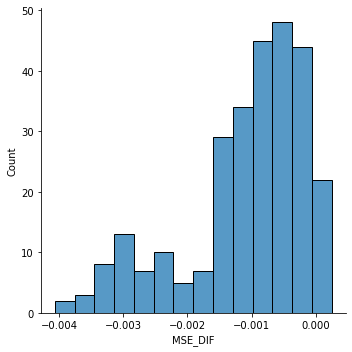

In [92]:
sns.displot(errors_df, x="MSE_DIF")

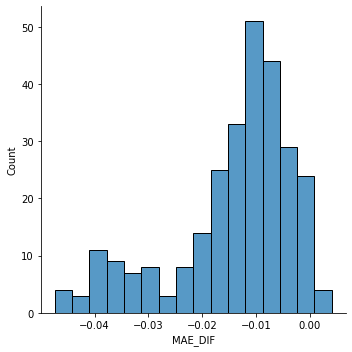

In [93]:
sns.displot(errors_df, x="MAE_DIF")

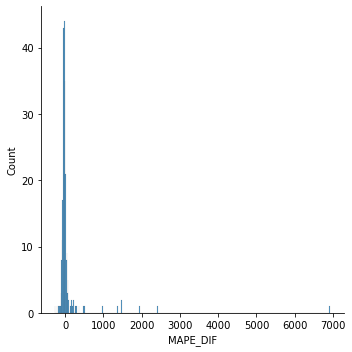

In [94]:
sns.displot(errors_df, x="MAPE_DIF")